## Kaatru - An Analysis

The problem statement requires the development of a "a model to find the variables that are significant in the demand for shared bikes", and also requires us to "report appropriate metrics of your model evaluation". Studying the dataset makes it clear that it is a regression problem - the dependent variable is `cnt` , denoting the demand for shared bikes. The independent variables can be termed "features", and this is essentially a problem of ascertaining feature importance. The higher the feature importance score, the more significant it in determining/predicting the dependent variable `cnt`.

A basic exploratory study of the dataset was done on Google Sheets - using Pearson's correlation coefficient and scatter plot graphs. This study was purely meant to visualise and understand trends in the dataset. This was done through individual scatter plots - plotting each feature like `yr` and `temp` against the `cnt` variable. Please [see this doc here](https://docs.google.com/spreadsheets/d/1WUwKtA9XK-rnY-FjhgkuIGdV4pS_wpWCO5aCNf1jSHM/edit?usp=sharing).
From this basic analysis, it can be seen that features `yr`, `temp`, and `atemp` can be considered important, due to their considerably high PPMC values. We can investigate this matter deeper using advanced tools from the scikit-learn library.

A random forest model is to be created to perform feature importance study. First, we’ll import all the required libraries and our dataset:

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

The given dataset is saved as a .csv file and converted into a pandas dataframe. The `dteday` feature has been removed because each instance of it is unique - and hence it is far better to use `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday` as features to mark the time component.

In [ ]:
Kaatru_data = pd.read_csv('/content/Kaatru DataSet.csv', index_col=False)
Kaatru_data.head()

In [ ]:
print(Kaatru_data)

List of features in the `Kaatru_data` dataframe:

In [4]:
Kaatru_data.columns.values

array(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype=object)

For the sake of convenience, another dataframe named `Kaatru_Xdata` is defined, which is devoid of the `cnt` data column.

In [22]:
Kaatru_Xdata = pd.read_csv('/content/Kaatru XDataSet.csv', index_col=False)
Kaatru_Xdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300


Below, the dataset is loaded into appropriate variables `X` and `y`.

In [23]:
Kaatru_data = Kaatru_data.reset_index()
Kaatru_Xdata = Kaatru_Xdata.reset_index()

In [29]:
X = pd.DataFrame(Kaatru_Xdata.iloc[:,[1,2,3,4,5,6,7,8,9,10,11]], columns=Kaatru_Xdata.columns[1:12].values)
#Accessing all columns in Kaatru_Xdata using iloc (except index column, with index 0)
#Assigning column names
y = Kaatru_data.loc[:,"cnt"] #cnt data here

In [ ]:
print(X)

The arrays with the loaded data are split into test and training sets.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The below code-block fits the random forest model onto the training data:

In [14]:
rf = RandomForestRegressor(n_estimators=150)
#n_estimators value should be optimal to prevent underfitting & overfitting
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150)

Now that the model is created, the feature importance values are pulled from it, and plotted.



In [ ]:
print(rf.feature_importances_)
total = sum(rf.feature_importances_)
print(total)

Text(0.5, 0, 'Feature Importance')

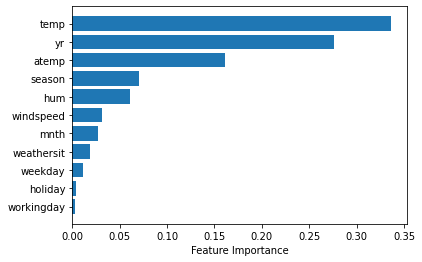

In [37]:
sort = rf.feature_importances_.argsort()
plt.barh(Kaatru_Xdata.columns[1:12].values[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

This graph shows a plot of the feature importance values - they add up to a total of 1, and represent the relative significance of the independent variables in determining/predicting the dependent variable.
This feature importance metric is called "Gini importance" (or 'mean decrease impurity'). According to this metric, the top 3 features seem to be `temp`, `yr`, and `atemp`. Variables `season` and `hum` come in next in importance.

Now, let's try two other ways of scoring feature importance, and see how they compare with each other and with the results from random forest. For regression, we have F-test and mutual information:

Mutual information measures mutual dependence between two variables by quantifying the amount of information obtained from one by observing the other. This is calculated through the KL divergence between the joint distribution and the product of the marginal distributions.

F-test for ANOVA analyzes how the variance of a variable across the values of another variable compares to itself. If it varies with a significant level, then some values of the second variable are responsible for a considerable part of the variance of the first one, while other values less so.

Methods based on the F-test estimate linear dependency between variables and are therefore prone to disregard alinear relationships. Mutual information does not fall into this, but requires more samples to work properly.



Below, the `Kaatru_data` dataframe is normalised/standardised, so as to remove the possiblity of skewed results due to different features being on different scales.

`Kaatru_data normalised`, is named `normal_data` in the above codeblock.

In [34]:
normal_data = normal_data.drop('index', axis=1)

season
yr
weathersit
temp
atemp
[142.48856573 349.8646524   61.06596762   3.45866847   0.95433134
   0.55659014  69.8727044  471.70512519 480.82845154   7.13871076
  42.60464256]


Text(0.5, 0, 'Feature Importance')

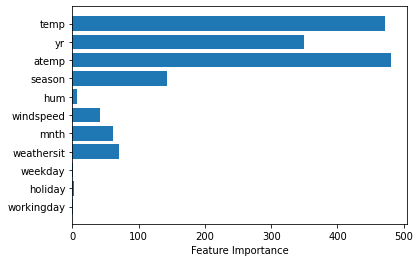

In [53]:
from sklearn.feature_selection import SelectKBest, f_regression

anova_filter_reg = SelectKBest(f_regression, k=5)
anova_filter_reg.fit(normal_data.drop(["cnt"], axis=1),
                     normal_data["cnt"])

for i in anova_filter_reg.get_support(indices=True):
    print(normal_data.columns[i])

print(anova_filter_reg.scores_)
plt.barh(normal_data.columns[0:11].values[sort], anova_filter_reg.scores_[sort])
plt.xlabel("Feature Importance")

This tells us that the important variables according to F-test are `atemp`, `temp`, `yr`, and `season` (which concurs with what we saw while looking at the correlation??)

season
yr
mnth
temp
atemp
[0.21707562 0.2744131  0.37248867 0.01110804 0.06588289 0.
 0.06431194 0.39044838 0.4663901  0.04450571 0.05678385]


Text(0.5, 0, 'Feature Importance')

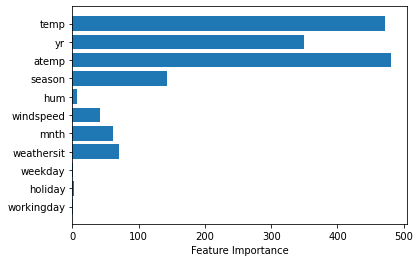

In [54]:
from sklearn.feature_selection import mutual_info_regression
mi_filter_reg = SelectKBest(mutual_info_regression, k=5)
mi_filter_reg.fit(normal_data.drop(["cnt"], axis=1),
                  normal_data["cnt"])

for i in mi_filter_reg.get_support(indices=True):
    print(normal_data.columns[i])

print(mi_filter_reg.scores_)
plt.barh(normal_data.columns[0:11].values[sort], anova_filter_reg.scores_[sort])
plt.xlabel("Feature Importance")

This tells us that the important variables according to mutual information method, are `atemp`, `temp`, `yr`, and `season`. This corroborates the F-test results, and increases confidence in the earlier idea that these are the important features for determining `cnt`.

Now we could try to fit a random forest model on the normalised data `normal data` and see if the feature importance changes.

In [55]:
X_normal = pd.DataFrame(normal_data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11]], columns=normal_data.columns[0:11].values)
#Accessing all columns in Kaatru_Xdata using iloc (except index column, with index 0)
#Understand why only using [1:12] in column index lets access all 11 columns?? that's how basic array indexing works. (Drill it)
#Assigning column names
y_normal = normal_data.loc[:,"cnt"] #cnt data here

In [42]:
print(X_normal)

       season        yr      mnth   holiday   weekday  workingday  weathersit  \
0   -1.349893 -0.999315 -1.601647 -0.171984 -0.997776    0.669177    1.111365   
1   -1.349893 -0.999315 -1.601647 -0.171984 -0.497861    0.669177    1.111365   
2   -1.349893 -0.999315 -1.601647 -0.171984  0.002054    0.669177   -0.724147   
3   -1.349893 -0.999315 -1.601647 -0.171984  0.501970    0.669177   -0.724147   
4   -1.349893 -0.999315 -1.601647 -0.171984  1.001885    0.669177   -0.724147   
..        ...       ...       ...       ...       ...         ...         ...   
725 -1.349893  0.999315  1.586560 -0.171984  1.001885    0.669177    1.111365   
726 -1.349893  0.999315  1.586560 -0.171984  1.501800   -1.492325    1.111365   
727 -1.349893  0.999315  1.586560 -0.171984 -1.497691   -1.492325    1.111365   
728 -1.349893  0.999315  1.586560 -0.171984 -0.997776    0.669177   -0.724147   
729 -1.349893  0.999315  1.586560 -0.171984 -0.497861    0.669177    1.111365   

         temp     atemp    

In [43]:
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normal, y_normal, test_size=0.25, random_state=42)

In [45]:
rf = RandomForestRegressor(n_estimators=150)
rf.fit(X_train_norm, y_train_norm)

RandomForestRegressor(n_estimators=150)

In [46]:
print(rf.feature_importances_)
total = sum(rf.feature_importances_)
print(total)

[0.06572655 0.27553903 0.026527   0.00336918 0.01198568 0.00316598
 0.01898758 0.32918744 0.17149999 0.06214989 0.03186168]
1.0


Text(0.5, 0, 'Feature Importance')

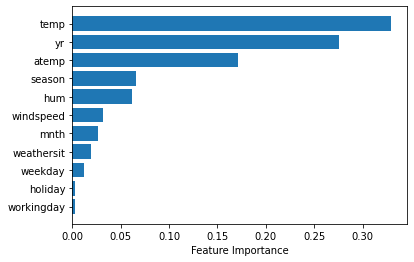

In [48]:
sort = rf.feature_importances_.argsort()
plt.barh(normal_data.columns[0:11].values[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

The important variables according to this analysis, are primarily `temp`, `yr` and `atemp`, followed by `season` and `hum`.

Three different modes have been employed in this analysis so as to cross-check the accuracy of feature importance order. The convergent solution suggests that `temp`, `atemp`, and `yr` are the top 3 most important features in this dataset, that predict for `cnt`. Among these 3 the exact order of importance is unclear; since the 3 different analyses lead to slight different ranks. A more accurate importance rank can be assigned after model accuracy is increased throguh hyperparameter tuning. As of now, however, this analysis answers the given problem statement.

Thanks for reading!